This notebook selects the configurations of interest from a classical molecular dynamics simulation (CLMD)  to generate a distribution of collective variables that follows a specified distribution. The system is composed of a single Alnine dipeptide molecule.
<br>

The first step is to generate a Moelcular dynamics trajectory with enhanced sampling techniques. This will be identified as the reference trajectory (refTraj). This  trajectory is located at (./reference_traj_CLC)

In [1]:
# imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plumed
import lammps_logfile as lmplog


In [2]:
# Load the LAMMPS log file and colvar file from the reference_traj_CLC
refTraj_log = './reference_traj_CLC/log.lammps'
refTraj_colvar = './reference_traj_CLC/colvar.dat'

# Append all dihedrals and timestep to a list
diheds = []
diheds.append(plumed.read_as_pandas(refTraj_colvar))

/tmp/ipykernel_26598/3908275074.py:7: UserWarning: cannot load PLUMED instance, conversions will not be available
  diheds.append(plumed.read_as_pandas(refTraj_colvar))


In [3]:
# ### OPTIONAL: Uncomment this block for plotting all the sampled variables in the refTraj_colvar
# ## Plot a histogram of the phi values
# plt.figure(figsize=(8,6))
# plt.hist(np.rad2deg(diheds[0].phi), bins=100)
# # Adding labels and title to the plot
# plt.title('Sampled $\phi$ dihedrals in the reference_traj_CLC ',fontsize=16, fontweight='bold')
# plt.xlabel('$\\phi$ (degrees)',fontsize=16, fontweight='bold')
# plt.ylabel('Frequency',fontsize=16, fontweight='bold')
# # Increase size of tick labels
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xticks(np.arange(-180, 180+60, step=60))
# # Darken the borders of the plot
# ax = plt.gca()
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)
# plt.tight_layout()
# plt.show()

# ## Plot a histogram of the phi values
# plt.figure(figsize=(8,6))
# plt.hist(np.rad2deg(diheds[0].psi), bins=100)
# # Adding labels and title to the plot
# plt.title('Sampled $\psi$ dihedrals in the reference_traj_CLC ',fontsize=16, fontweight='bold')
# plt.xlabel('$\\psi$ (degrees)',fontsize=16, fontweight='bold')
# plt.ylabel('Frequency',fontsize=16, fontweight='bold')
# # Increase size of tick labels
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xticks(np.arange(-180, 180+60, step=60))
# # Darken the borders of the plot
# ax = plt.gca()
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)
# plt.tight_layout()
# plt.show()


# ## Plot 2D histogram
# phi = diheds[0].phi.values
# psi = diheds[0].psi.values
# # Define number of bins for each axis
# bins = 50

# # Create 2D histogram
# hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins)

# # Create figure and increase figure size
# fig = plt.figure(figsize=(8, 6))
# # Plot histogram
# plt.hist2d(phi, psi, bins=bins, cmap=plt.cm.jet)

# # Increase size of color bar label size and tick labels
# cbar = plt.colorbar(label="Count")
# cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_ylabel('Count', fontsize=14, labelpad=20,fontweight="bold")

# # Add labels and title
# ax = plt.gca()
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)
# plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)
# plt.title("2D histogram of Sampled phi and Psi in Reference_Traj_CLC\n",fontsize=18,fontweight="bold")
# plt.xlabel(" $\phi$ (rad)",fontsize=16,fontweight="bold")
# plt.ylabel(" $\psi$ (rad)",fontsize=16,fontweight="bold")
# plt.tight_layout()
# plt.show()




Define the functions to select the phi ans psi configurations required to generate the Bolzman Distribution.

In [4]:
## Function to select samples mantaining the boltzmann distribution. 

import numpy as np

def generate_samples_with_distribution(arr1, arr2, n):
    
    # We want n total samples, so we need n/2 from each array
    n = int(n/2 )
    
    # Calculate unique values and their counts for arr1 and arr2
    unique_values1, counts1 = np.unique(arr1, return_counts=True)
    unique_values2, counts2 = np.unique(arr2, return_counts=True)
    
    # Calculate probabilities for sampling each element
    probs1 = counts1 / len(arr1)
    probs2 = counts2 / len(arr2)
    
    
    # Generate samples using random choice with replacement
    np.random.seed(42)
    samples1 = np.random.choice(unique_values1, size=n, replace=False, p=probs1)
    samples2 = np.random.choice(unique_values2, size=n, replace=False, p=probs2)
    
    return samples1, samples2


# Redefine the arrays to get phi and psi values
original_array1 = diheds[0].phi.values
original_array2 = diheds[0].psi.values 


In [5]:
# ## Use the function to obtain 2500 phi ans psi values that follow tha Boltzmann distribution

# n_samples = 2500
# samples1, samples2 = generate_samples_with_distribution(original_array1, original_array2, n_samples)


# # ## OPTIONAL: PLOT 2D HISTOGRAM OF SELECTED SAMPLES. UNCOMMENT BELLOW TO USE
# # # Create figure and increase figure size
# # fig = plt.figure(figsize=(8, 6))
# # phi = np.rad2deg(samples1)
# # psi = np.rad2deg(samples2)
# # # Define number of bins for each axis
# # bins = 50

# # # Create 2D histogram
# # hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins)

# # # Create figure and increase figure size
# # fig = plt.figure(figsize=(8, 6))
# # # Plot histogram
# # plt.hist2d(phi, psi, bins=bins, cmap='plasma')

# # # Increase size of color bar label size and tick labels
# # cbar = plt.colorbar(label="Frequency")
# # cbar.ax.tick_params(labelsize=12)
# # cbar.ax.set_ylabel('Frequency', fontsize=14, labelpad=20,fontweight="bold")
# # plt.xticks(np.arange(-180, 180+60, 60))
# # plt.yticks(np.arange(-180, 180+60, 60))

# # # Add labels and title
# # ax = plt.gca()
# # ax.spines['top'].set_linewidth(2)
# # ax.spines['right'].set_linewidth(2)
# # ax.spines['bottom'].set_linewidth(2)
# # ax.spines['left'].set_linewidth(2)
# # plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)
# # plt.title("ADP BD with 2500 configurations\n",fontsize=18,fontweight="bold")
# # plt.xlabel("$\phi$ (degrees)",fontsize=16,fontweight="bold")
# # plt.ylabel("$\psi$ (degrees)",fontsize=16,fontweight="bold")
# # plt.show()

<Figure size 800x600 with 0 Axes>

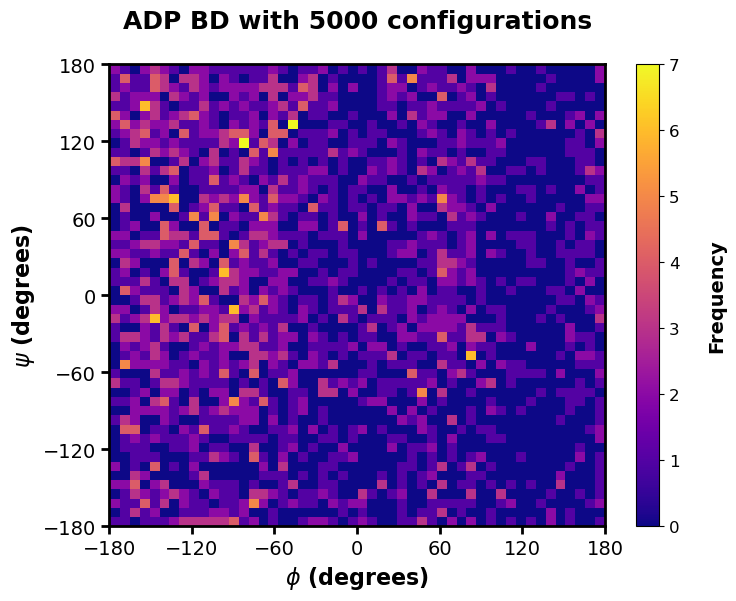

In [6]:
## Use the function to obtain 2500 phi ans psi values that follow tha Boltzmann distribution

n_samples = 5000
samples1, samples2 = generate_samples_with_distribution(original_array1, original_array2, n_samples)


## OPTIONAL: PLOT 2D HISTOGRAM OF SELECTED SAMPLES. UNCOMMENT BELLOW TO USE
# Create figure and increase figure size
fig = plt.figure(figsize=(8, 6))
phi = np.rad2deg(samples1)
psi = np.rad2deg(samples2)
# Define number of bins for each axis
bins = 50

# Create 2D histogram
hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins)

# Create figure and increase figure size
fig = plt.figure(figsize=(8, 6))
# Plot histogram
plt.hist2d(phi, psi, bins=bins, cmap='plasma')

# Increase size of color bar label size and tick labels
cbar = plt.colorbar(label="Frequency")
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_ylabel('Frequency', fontsize=14, labelpad=20,fontweight="bold")
plt.xticks(np.arange(-180, 180+60, 60))
plt.yticks(np.arange(-180, 180+60, 60))

# Add labels and title
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)
plt.title("ADP BD with 5000 configurations\n",fontsize=18,fontweight="bold")
plt.xlabel("$\phi$ (degrees)",fontsize=16,fontweight="bold")
plt.ylabel("$\psi$ (degrees)",fontsize=16,fontweight="bold")
plt.show()

In [7]:
#### Determine the indexes of the selected samples

# For phi
df = diheds[0].copy()
samp_dihed_index_phi = df[df['phi'].isin(samples1)].index.tolist()
samp_dihed_index_phi = samp_dihed_index_phi[:int(n_samples/2)]
diheds_phi_from_index = df.phi.values[samp_dihed_index_phi]
time_from_index = df.time.values[samp_dihed_index_phi]

# For psi
df = diheds[0].copy()
samp_dihed_index_psi = df[df['psi'].isin(samples2)].index.tolist()
samp_dihed_index_psi = samp_dihed_index_psi[:int(n_samples/2)]
diheds_psi_from_index = df.psi.values[samp_dihed_index_psi]
time_from_index = df.time.values[samp_dihed_index_psi]


In [8]:
## USe the indices and the functions in the lmp_spc_scripts script
from lmp_spc_scripts import read_xyz_traj,xyz_cords_array,lmp_data_subs_coord,change_data_file_name
import os

In [9]:
# Define name of working files, trajectory, example input, lammps input and name of file to run CLCL single point calculations
working_dir = f'reference_traj_CLC/'
xyz_traj_file = 'traj_nnip.xyz'
og_data_file = './example.input'
lmp_input_file = './in.ADP_ABF_Example0'
lmp_spc_folder = './lmp_CLC_BD_2500Frames/'
work_dir = 'frame_'
LOUD = True

In [10]:
## Check if the lmp_spc_folder exits, if not create it
if not os.path.exists(lmp_spc_folder):
    os.makedirs(lmp_spc_folder)
    
# Extract coordinates from xyz trajectory file
working_xyz_file = working_dir + xyz_traj_file
if LOUD:
    print(f'Looking for xyz file: {working_xyz_file}')
    print(f'File Found...\n\nReading Coordinates...')
    
# Read the coordinates from the xyz file
xyz_traj_dict = read_xyz_traj(working_xyz_file)

#extract coordinaes from indices from Phi dihedral 
for i, frame in enumerate(samp_dihed_index_phi):
    #if LOUD:
    print(f'{i+1}. Extracting coordinates from frame {i}. Index: {frame}\n')
        
    # Extract coordinates from xyz trajectory file from index of interest
    xyz_coordinates = xyz_cords_array(xyz_traj_dict,frame)   #xyz_traj_dict['frames'][indices[i]]
    
    # Substitute the coordinates in the lammps data file
    lmp_data_subs_coord(xyz_coordinates,og_data_file,f'{lmp_spc_folder}frame_{i}.data',LOUD=False)
    # REname the filename in the read_data command in the lammps input file
    change_data_file_name('./in.ADP_ABF_Example0',f'frame_{i}.data',LOUD=False)

    #3. Create directory to store lammps data and input files.
    os.makedirs(lmp_spc_folder+f'frame_{i}', exist_ok=True)
    print(f'Created directory: {lmp_spc_folder}frame_{i}\n\n')
    # Check if folder exists
    
    # move the data file to the folder
    os.system(f'mv {lmp_spc_folder}frame_{i}.data {lmp_spc_folder}/frame_{i}/')

    # Copy the input file to the folder
    os.system(f'cp {lmp_input_file} ./plumed.dat {lmp_spc_folder}/frame_{i}/')
    
    

#extract coordinaes from indices from Psi dihedral## Repeat the loop for psi dihedral

#extract coordinaes from indices from Phi dihedral 
for i, frame in enumerate(samp_dihed_index_psi, start=len(samp_dihed_index_phi)):
    if LOUD:
        print(f'{i+1}. Extracting coordinates from frame {i}. Index: {frame}')
        
    # Extract coordinates from xyz trajectory file from index of interest
    xyz_coordinates = xyz_cords_array(xyz_traj_dict,frame)   #xyz_traj_dict['frames'][indices[i]]
    
    # Substitute the coordinates in the lammps data file
    lmp_data_subs_coord(xyz_coordinates,og_data_file,f'{lmp_spc_folder}frame_{i}.data',LOUD=False)
    # REname the filename in the read_data command in the lammps input file
    change_data_file_name('./in.ADP_ABF_Example0',f'frame_{i}.data',LOUD=False)

    #3. Create directory to store lammps data and input files.
    os.makedirs(lmp_spc_folder+f'frame_{i}', exist_ok=True)
    print(f'Created directory: {lmp_spc_folder}frame_{i}\n\n')
    # Check if folder exists
    
    # move the data file to the folder
    os.system(f'mv {lmp_spc_folder}frame_{i}.data {lmp_spc_folder}/frame_{i}/')

    # Copy the input file to the folder
    os.system(f'cp {lmp_input_file} ./plumed.dat {lmp_spc_folder}/frame_{i}/')
    

Looking for xyz file: reference_traj_CLC/traj_nnip.xyz
File Found...

Reading Coordinates...
1. Extracting coordinates from frame 0. Index: 28

Created directory: ./lmp_CLC_BD_2500Frames/frame_0


2. Extracting coordinates from frame 1. Index: 76

Created directory: ./lmp_CLC_BD_2500Frames/frame_1


3. Extracting coordinates from frame 2. Index: 100

Created directory: ./lmp_CLC_BD_2500Frames/frame_2


4. Extracting coordinates from frame 3. Index: 116

Created directory: ./lmp_CLC_BD_2500Frames/frame_3


5. Extracting coordinates from frame 4. Index: 137

Created directory: ./lmp_CLC_BD_2500Frames/frame_4


6. Extracting coordinates from frame 5. Index: 173

Created directory: ./lmp_CLC_BD_2500Frames/frame_5


7. Extracting coordinates from frame 6. Index: 223

Created directory: ./lmp_CLC_BD_2500Frames/frame_6


8. Extracting coordinates from frame 7. Index: 246

Created directory: ./lmp_CLC_BD_2500Frames/frame_7


9. Extracting coordinates from frame 8. Index: 277

Created directory